In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.1)
m, n = X_moons.shape

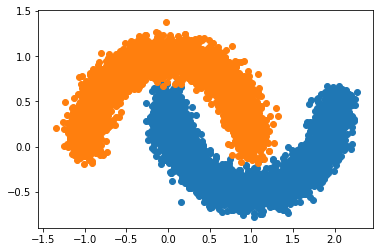

In [23]:
plt.scatter(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1])
plt.scatter(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1])

In [26]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons = y_moons.reshape(-1, 1)

In [27]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m) / batch_size)
learning_rate = 0.001

In [30]:
def fetch_batch(batch_size):
    indices = np.random.randint(m, size=batch_size)
    X_batch = X_moons_with_bias[indices]
    y_batch = y_moons[indices]
    return X_batch, y_batch

In [33]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n+1), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

weights = tf.Variable(tf.random_uniform([n+1, 1], -1., 1.), name='weights')
logits = tf.matmul(X, weights, name='logits')
y_proba = tf.sigmoid(logits, name='probability')

log_loss = tf.losses.log_loss(y, y_proba)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(log_loss)

In [35]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs): 
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 100 == 0:
            print epoch, 'Log loss', log_loss.eval(feed_dict={X: X_batch, y: y_batch})
    best_weights = weights.eval()
    print 'Best weights', best_weights

0 Log loss 0.52835375
100 Log loss 0.32268533
200 Log loss 0.23353148
300 Log loss 0.23004635
400 Log loss 0.28929576
500 Log loss 0.18651439
600 Log loss 0.22574657
700 Log loss 0.19588472
800 Log loss 0.2513456
900 Log loss 0.26327875
Best weights [[ 0.91737  ]
 [ 1.2039251]
 [-5.9849052]]
